In [ ]:
import os
import sys
sys.path.append("../scripts")
from gmf_shell_mapper import generate_shell_fits


# === STEP 0: Configuration ===
GMF_FILENAME = "GMF/GMF_earth_centered_cube.dat"
OUTPUT_DIR = "fits_shell_fields"
HEALPIX_ORDER = 8
R_MAX_PC = 2000     # Outer radius in parsecs
R_SPACING_PC = 2.5   # Radial spacing in parsecs

# === Generate FITS Shell Maps ===
generate_shell_fits(
    gmf_filename=GMF_FILENAME,
    output_dir=OUTPUT_DIR,
    healpix_order=HEALPIX_ORDER,
    r_max_pc=R_MAX_PC,
    r_spacing_pc=R_SPACING_PC
)

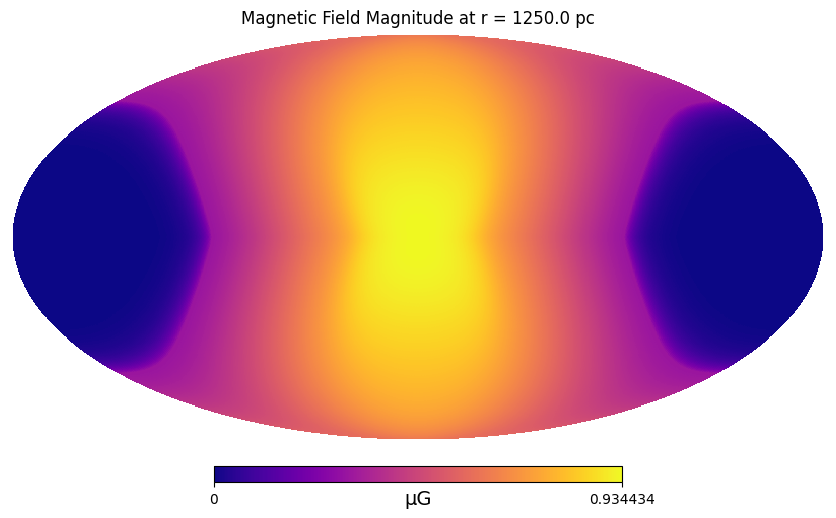

In [ ]:
import healpy as hp
from astropy.io import fits
import matplotlib.pyplot as plt

filename = "fits_shell_fields/shell_r0500.fits"      # "fits_shell_fields/shell_r0xyz.fits"
with fits.open(filename) as hdul:
    data = hdul[1].data
    header = hdul[1].header
    r = header.get('RADIUS', None)

Btot = data['B_z_uG'] 
hp.mollview(Btot, title=f"Magnetic Field Magnitude at r = {r} pc", unit="μG", norm="hist", cmap="plasma",nest=False)
plt.show()